# Visulising 2D Distribution

we will be using the Kagle UCI database as an examlple set.You can find it here at :
https://www.kaggle.com/nasa/meteorite-landings

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
import numpy as np 

In [3]:
df=pd.read_csv("../meteorite-landings.csv")
df.head()


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [5]:
df=df.dropna(subset=["reclong","reclat"])
df=df[df.reclong<300];

# 2D Histograms
 The staple

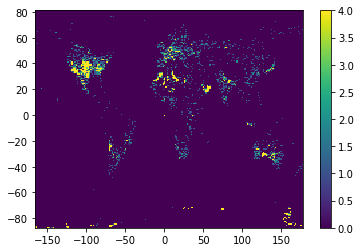

In [6]:
plt.hist2d(df.reclong,df.reclat,bins=200,vmax=4)
plt.colorbar();

# 2D hexplots

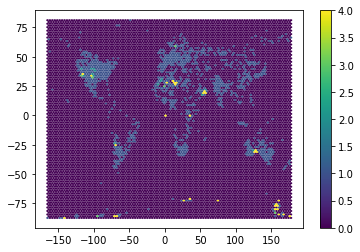

In [7]:
plt.hexbin(df.reclong,df.reclat,bins=200,vmax=4,lw=0.0);
plt.colorbar();

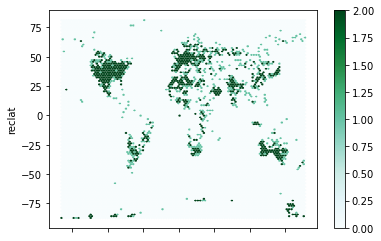

In [8]:
df.plot.hexbin(x="reclong",y="reclat",gridsize=100,vmin=0,vmax=2,linewidth=0.0);

# Contour

it is easier to show these plot using data with broader shapes, so let's make some.

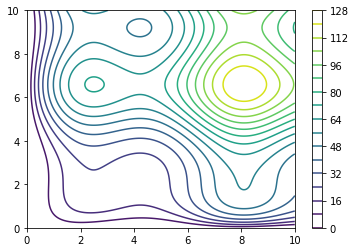

In [9]:
spacing=np.linspace(0,10,200)
X,Y=np.meshgrid(spacing,spacing)
Z=(np.sin(X)+np.cos(Y)+2*np.arcsinh(X*Y))**2

plt.contour(X,Y,Z, levels=20)
plt.colorbar();

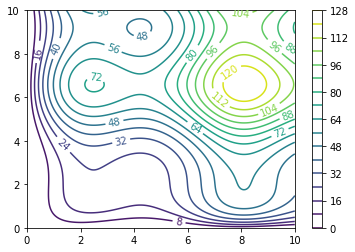

In [10]:
c=plt.contour(X,Y,Z, levels=20)
plt.clabel(c, inline=True, fontsize=10)
plt.colorbar();

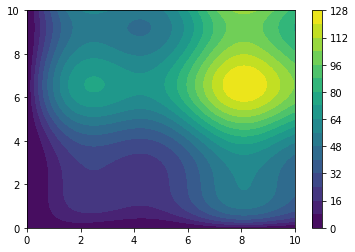

In [12]:
c=plt.contourf(X,Y,Z,levels=20)
plt.colorbar();

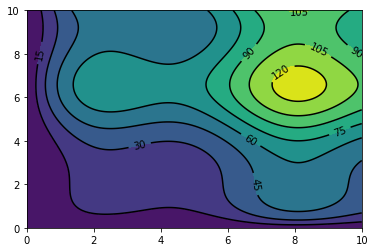

In [17]:
plt.contourf(X,Y,Z,levels=10)
c=plt.contour(X,Y,Z,levels=10,colors="black")
plt.clabel(c,inline=True,fontsize=10);


# KDE
To Loook at KDE, we will draw some samples from the above surface

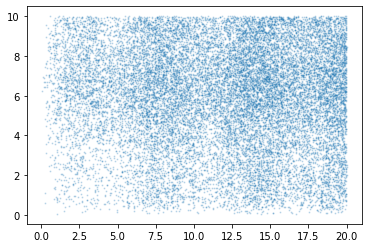

In [19]:
#this is called rejection sampling, a way to brute force sample any surface, so long as you are fine waiting for slow code.

n=50000
xs,ys=np.random.uniform(0,20,n),np.random.uniform(0,10,n)
zs=(np.sin(xs)+np.cos(ys)+2 * np.arcsinh(xs*ys))**2
zs/= zs.max()
passed=np.random.uniform(0,1,n)<zs
xs,ys=xs[passed],ys[passed]
plt.scatter(xs,ys,s=1,alpha=0.2);